<!DOCTYPE html>
<html>
<head>
<title>Upload Picture</title>
<style>
body {
  background-color: black;
}
</style>
</head>
<body>
<h1>Upload Your Picture</h1>

<form action="upload.php" method="post" enctype="multipart/form-data">
<label for="file">Select your picture:</label>
<input type="file" id="file" name="file">
<br>
<input type="submit" value="Upload">
</form>
</body>
</html>


[//]: <> (Table of content)
<a id="top"></a>
# <div style="padding:25px;color:cyan;margin:0;font-size:35px;font-family:Arial;text-align:left;display:fill;border-radius:5px;background-color:#000000;border: 2px solid blue;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:#CCFFCC; padding:30px; font-size:15px; color: #4E5672; border: 1px solid #034914">
    
* [1. Introduction](#1)
  
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    - [About license](#1.3)
    
* [2. Import Libraries](#2) 

* [3. Crawling Dataset](#3)
    
* [4. Preprocessing](#4)

    - [Read raw data](#4.1)
    - [Exploring data](#4.2)
    - [Cleaning data](#4.3)
    - [Transformating data](#4.4)

* [5. Exploratory Data Analysis](#5)

    - [Exploring data](#5.1)
    - [Make question](#5.2)

* [6. Machine Learning model](#6)

    - [Data preparation](#6.1)
    - [Feature engineering](#6.2)
    - [Training model](#6.3)
    - [Evaluation](#6.4)
    - [Prediction](#6.5)
    - [Results analysis](#6.6)
    
* [7. Conclusion](#7)

* [8. Author Message](#8)

</div>

<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Introduction</b></div>

<a id="1.1"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Problem</b> statement

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>

On going!

</div>

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Data</b> description

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">

<h3 align="left"><font color='#4E5672'>👀 Features: </font></h3>
On going!
    
</div>



<a id="1.3"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>About</b> license

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">

<h3 align="left"><font color='#4E5672'>✅ License:</font></h3>

None!

</div>

<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Import Libraries</b></div>

In [394]:
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


print("Setup Complete!")

Setup Complete!


<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Crawling Dataset</b></div>

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Crawling data</b></span>

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Save collected data</b></span>

<a id="4"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Preprocessing</b></div>

<a id="4.1"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Read</b> raw data

In [395]:
raw_train_path = 'train.csv'
raw_test_path = 'test.csv'
submission_path = 'sample_submission.csv'

In [396]:
def isPathExists(path):
    return os.path.exists(path)

for path in [raw_train_path, raw_test_path, submission_path]:
    if not isPathExists(path):
        print("File not found: {}".format(path))
        exit(1)

In [397]:
raw_train = pd.read_csv(raw_train_path)
raw_test = pd.read_csv(raw_test_path)
submission = pd.read_csv(submission_path)

In [398]:
def concat_df(train_data, test_data):
    train_data['Group'] = 'train'
    test_data['Group'] = 'test'
    
    return pd.concat([train_data, test_data], ignore_index=True).reset_index(drop=True)

df = concat_df(raw_train, raw_test)

In [399]:
df.head()

,id,keyword,location,text,target,Group
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,train
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,train
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1.0,train
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,train
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,train


In [400]:
del df['id']

<a id="4.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Exploring</b> data

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
How many rows and how many columns does the raw data have? </b></span>

In [401]:
shape = raw_train.shape

In [402]:
# TEST
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (7613, 6)
Your data good!.


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Does the raw data have duplicate rows?  </b></span>

In [403]:
def isDuplicateExists(df):
    index = df.index
    detectDupSeries = index.duplicated(keep='first')
    num_duplicated_rows = detectDupSeries.sum()
    return True if num_duplicated_rows > 0 else False

In [404]:
is_duplicate_exists = isDuplicateExists(df)

In [405]:
# De-deduplicate your raw data
if is_duplicate_exists:
    raw_train_df = df.drop_duplicates(keep='first')
    print('Shape after de-deduplicate: ', raw_train_df.shape)
else:
    print('No duplicate rows found')

No duplicate rows found


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?  </b></span>

In [406]:
def findDataType(df):
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    num_cols = df.select_dtypes(include='number').columns.tolist()
    return cat_cols, num_cols

In [407]:
cat_cols, num_cols = findDataType(df)
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: ['keyword', 'location', 'text', 'Group']
Numerical columns: ['target']


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
TODO: Your observation
</span>


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
For each column with a non-numeric data type, how are the values distributed? </b></span>

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* For non-numeric columns in a Pandas DataFrame, calculate the following:

  * Percentage of missing values: This is the percentage of values in the column that are missing, from 0 to 100.
  
  * Number of unique values: This is the number of different values in the column, excluding missing values. For categorical columns, this is the same as the number of categories.
  
  * Percentage of each value: This is the percentage of each unique value in the column, sorted by decreasing percentage. Missing values are excluded from this calculation.

* To calculate the percentage of each value, you can use a dictionary to store the results, where the key is the value and the value is the percentage. For categorical columns, the method is the same.

* Save the results to a Pandas DataFrame called cat_col_info_df, with the following columns:

  * Column name: The name of the non-numeric column in the original DataFrame (raw_df)
  
  * missing_ratio: The percentage of missing values in the column
  
  * num_values: The number of unique values in the column, excluding missing values
  
  * value_ratios: A dictionary of the percentage of each unique value in the column, sorted by decreasing percentage

* To improve readability, round all values to one decimal place using the .round(1) method.
  
</div>

In [408]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [409]:
cat_col_info_df = df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(3)

def num_values(s):
    s = s.astype(str).str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.astype(str).str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,keyword,location,text,Group
missing_ratio,0.8,33.45,0.0,0.0
num_values,222,4532,11318,2
value_ratios,"{'nan': 0.8, 'landslide': 0.5, 'lightning': 0.5, 'loud%20bang': 0.5, 'mass%20murder': 0.5, 'mass...","{'nan': 33.4, 'USA': 1.3, 'New York': 1.0, 'United States': 0.6, 'London': 0.5, 'Canada': 0.4, '...","{'&gt': 0.3, '': 0.1, '11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-...","{'train': 70.0, 'test': 30.0}"


In [410]:
missing_ratio_of_cat_cols = {item: value for item, value in dict(cat_col_info_df.iloc[0]).items() if value > 0}
print('Missing ratio: ', missing_ratio_of_cat_cols)

Missing ratio:  {'keyword': 0.8, 'location': 33.45}


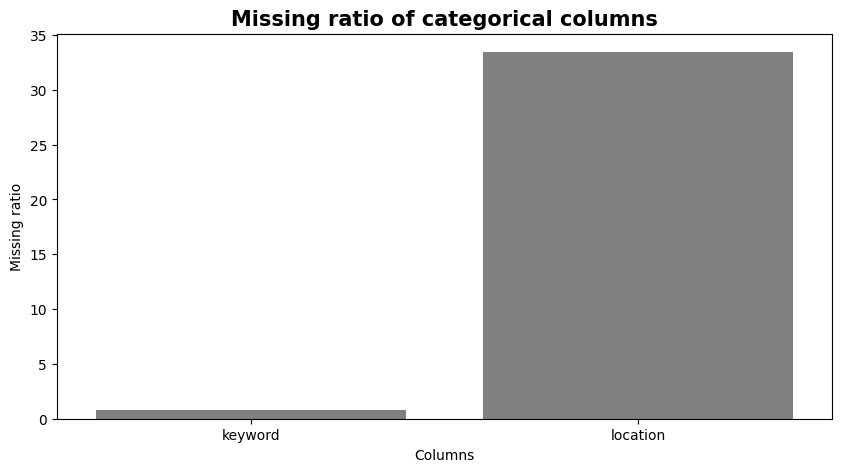

In [411]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=list(missing_ratio_of_cat_cols.keys()), y=list(missing_ratio_of_cat_cols.values()), color = 'grey')

plt.title('Missing ratio of categorical columns', fontsize=15, fontweight='bold')

plt.xlabel('Columns', fontsize=10)
plt.ylabel('Missing ratio', fontsize=10)

plt.show()

<a id="4.3"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Cleaning </b> data

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* Once the basic statistical properties of the data have been established, the next step is to identify features with a significant number of missing values. These features are not conducive to the analysis process and should be eliminated from the dataset.

* The threshold for determining "significant" missingness can be tailored to specific objectives. As a general rule, if a feature exhibits a missing value percentage exceeding 75%, it is removed from the dataframe, resulting in an updated dataframe.
  
</div>


In [412]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict, threshold: float = 75.0) -> pd.DataFrame:
    """Drop missing features from Pandas dataframe base on given threshold.

    Args:
        df (pd.DataFrame): Input dataframe for processing.
        missing_lst (dict, optional): Dict missing value rate which calculated from previous stage. Defaults to dict(num_col_info_df.iloc[0]).
        threshold (float, optional): User threshold for dropping. Defaults to 75.0.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")
        
    return df_cp

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* Despite eliminating features with a substantial number of missing values, missing values persist in our dataframe. Consequently, we must impute these missing values to render the data suitable for analysis.
  
</div>


In [413]:
def fillingMissingValue(df, cat_cols, num_cols):
    df_cp = df.copy()
    df_cp.fillna(np.nan, inplace=True)
    
    if cat_cols:
        df_cp[cat_cols] = df_cp[cat_cols].fillna('None')
    
    if num_cols:
        df_cp[num_cols] = df_cp[num_cols].fillna(0)
        
    return df_cp

In [414]:
missing_cat_cols = list(missing_ratio_of_cat_cols.keys())
missing_num_cols = None

df = fillingMissingValue(df, cat_cols, num_cols)

In [415]:
df.select_dtypes(include=['object', 'bool']).agg([missing_ratio, num_values, value_ratios])

,keyword,location,text,Group
missing_ratio,0.0,0.0,0.0,0.0
num_values,222,4532,11318,2
value_ratios,"{'None': 0.8, 'landslide': 0.5, 'lightning': 0.5, 'loud%20bang': 0.5, 'mass%20murder': 0.5, 'mas...","{'None': 33.4, 'USA': 1.3, 'New York': 1.0, 'United States': 0.6, 'London': 0.5, 'Canada': 0.4, ...","{'&gt': 0.3, '': 0.1, '11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-...","{'train': 70.0, 'test': 30.0}"


In [416]:
df.insert(3, 'tidy_text', df['text'])

In [417]:
df.head()

,keyword,location,text,tidy_text,target,Group
0,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,train
1,None,None,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,1.0,train
2,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1.0,train
3,None,None,"13,000 people receive #wildfires evacuation orders in California","13,000 people receive #wildfires evacuation orders in California",1.0,train
4,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,train


In [418]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
STOP_WORDS = stopwords.words("english")


def get_words(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub("\d+", " ", text)
    return [s for s in re.split("\W+", text) if len(s) > 0]


def extract_features_from_text(df):
    df['word_count'] = df['text'].apply(lambda x: len(get_words(x)))
    df['unique_word_count'] = df['text'].apply(lambda x: len(set(get_words(x))))
    df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in get_words(x) if w in STOP_WORDS]))
    df['average_word_length'] = df['text'].apply(lambda x: np.around(np.mean([len(w) for w in get_words(x)]), 1))
    df['text_length'] = df['text'].apply(lambda x: len(str(x)))
    df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    df['url_link_count'] = df['text'].apply(lambda x: len(re.findall('http[s]?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', str(x))))
    df['hashtag_count'] = df['text'].apply(lambda x: len(re.findall('(^|\W)#', str(x))))
    df['mention_count'] = df['text'].apply(lambda x: len(re.findall('(^|\W)+@', str(x))))
    return df

df = extract_features_from_text(df)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,keyword,location,text,tidy_text,target,Group,word_count,unique_word_count,stop_word_count,average_word_length,text_length,punctuation_count,url_link_count,hashtag_count,mention_count
0,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,train,13,13,6,4.3,69,1,0,1,0
1,None,None,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,1.0,train,7,7,0,4.4,38,1,0,0,0
2,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1.0,train,22,18,11,5.0,133,3,0,0,0
3,None,None,"13,000 people receive #wildfires evacuation orders in California","13,000 people receive #wildfires evacuation orders in California",1.0,train,7,7,1,7.1,65,2,0,1,0
4,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,train,16,15,7,4.4,88,2,0,2,0


In [419]:
chat_words_str = "AFAIK=As Far As I Know\n" \
                 "AFK=Away From Keyboard\n" \
                 "ASAP=As Soon As Possible\n" \
                 "ATK=At The Keyboard\n" \
                 "ATM=At The Moment\n" \
                 "A3=Anytime, Anywhere, Anyplace\n" \
                 "BAK=Back At Keyboard\n" \
                 "BBL=Be Back Later\n" \
                 "BBS=Be Back Soon\n" \
                 "BFN=Bye For Now\n" \
                 "B4N=Bye For Now\n" \
                 "BRB=Be Right Back\n" \
                 "BRT=Be Right There\n" \
                 "BTW=By The Way\n" \
                 "B4=Before\n" \
                 "B4N=Bye For Now\n" \
                 "CU=See You\n" \
                 "CUL8R=See You Later\n" \
                 "CYA=See You\n" \
                 "FAQ=Frequently Asked Questions\n" \
                 "FC=Fingers Crossed\n" \
                 "FWIW=For What It's Worth\n" \
                 "FYI=For Your Information\n" \
                 "GAL=Get A Life\n" \
                 "GG=Good Game\n" \
                 "GN=Good Night\n" \
                 "GMTA=Great Minds Think Alike\n" \
                 "GR8=Great!\n" \
                 "G9=Genius\n" \
                 "IC=I See\n" \
                 "ICQ=I Seek you (also a chat program)\n" \
                 "ILU=ILU: I Love You\n" \
                 "IMHO=In My Honest/Humble Opinion\n" \
                 "IMO=In My Opinion\n" \
                 "IOW=In Other Words\n" \
                 "IRL=In Real Life\n" \
                 "KISS=Keep It Simple, Stupid\n" \
                 "LDR=Long Distance Relationship\n" \
                 "LMAO=Laugh My A.. Off\n" \
                 "LOL=Laughing Out Loud\n" \
                 "LTNS=Long Time No See\n" \
                 "L8R=Later\n" \
                 "MTE=My Thoughts Exactly\n" \
                 "M8=Mate\n" \
                 "NRN=No Reply Necessary\n" \
                 "OIC=Oh I See\n" \
                 "PITA=Pain In The A..\n" \
                 "PRT=Party\n" \
                 "PRW=Parents Are Watching\n" \
                 "QPSA?=Que Pasa?\n" \
                 "ROFL=Rolling On The Floor Laughing\n" \
                 "ROFLOL=Rolling On The Floor Laughing Out Loud\n" \
                 "ROTFLMAO=Rolling On The Floor Laughing My A.. Off\n" \
                 "SK8=Skate\n" \
                 "STATS=Your sex and age\n" \
                 "ASL=Age, Sex, Location\n" \
                 "THX=Thank You\n" \
                 "TTFN=Ta-Ta For Now!\n" \
                 "TTYL=Talk To You Later\n" \
                 "U=You\n" \
                 "U2=You Too\n" \
                 "U4E=Yours For Ever\n" \
                 "WB=Welcome Back\n" \
                 "WTF=What The F...\n" \
                 "WTG=Way To Go!\n" \
                 "WUF=Where Are You From?\n" \
                 "W8=Wait...\n" \
                 "7K=Sick:-D Laugher\n" \
                 "TFW=That feeling when. TFW internet slang often goes in a caption to an image.\n" \
                 "MFW=My face when\n" \
                 "MRW=My reaction when\n" \
                 "IFYP=I feel your pain\n" \
                "LOL=Laughing out loud\n" \
                "TNTL=Trying not to laugh\n" \
                "JK=Just kidding\n" \
                "IDC=I don't care\n" \
                "ILY=I love you\n" \
                "ADIH=Another day in hell\n" \
                "IDC=I don't care\n" \
                "ZZZ=Sleeping, bored, tired\n" \
                "WYWH=Wish you were here\n" \
                "TIME=Tears in my eyes\n" \
                "BAE=Before anyone else\n" \
                "FIMH=Forever in my heart\n" \
                "BSAAW=Big smile and a wink\n" \
                "BWL=Bursting with laughter\n" \
                "LMAO=Laughing my a** off\n" \
                "BFF=Best friends forever\n" \
                "CSL=Can't stop laughing \n"

In [420]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)  
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

In [421]:
from spellchecker import SpellChecker

def lower_text(text):
    return text.lower()

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

contractions_dict = {"ain't": "are not","'s ":" is ","aren't": "are not", "'m ":" am ","can't": "can not", "'ll": "will", "dont": "do not"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            correction = spell.correction(word)
            if correction is not None:  # Skip None values
                corrected_text.append(correction)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def format_text(text):
    text = chat_words_conversion(text)
    text = lower_text(text)
    text = expand_contractions(text)
    # text = correct_spellings(text)
    return text

In [422]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: format_text(x))
df[['text', 'tidy_text']].head(10)

,text,tidy_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,our deeds are the reason of this #earthquake may allah forgive us all
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or...
3,"13,000 people receive #wildfires evacuation orders in California","13,000 people receive #wildfires evacuation orders in california"
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,#rockyfire update => california hwy. 20 closed in both directions due to lake county fire - #caf...
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas","#flood #disaster heavy rain causes flash flooding of streets in manitou, colorado springs areas"
7,I'm on top of the hill and I can see a fire in the woods...,i am on top of the hill and i can see a fire in the woods...
8,There's an emergency evacuation happening now in the building across the street,there is an emergency evacuation happening now in the building across the street
9,I'm afraid that the tornado is coming to our area...,i am afraid that the tornado is coming to our area...


In [423]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [424]:
HT_regular = hashtag_extract(df['tidy_text'][(df['Group'] == 'train') & (df['target'] == 0)])
HT_negative = hashtag_extract(df['tidy_text'][(df['Group'] == 'train') & (df['target'] == 1)])

HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

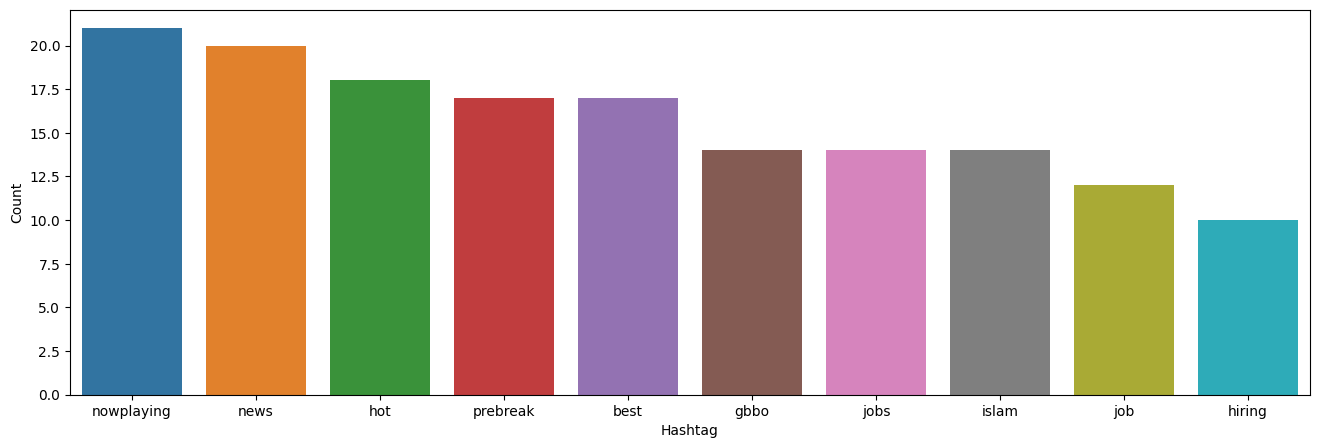

In [425]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

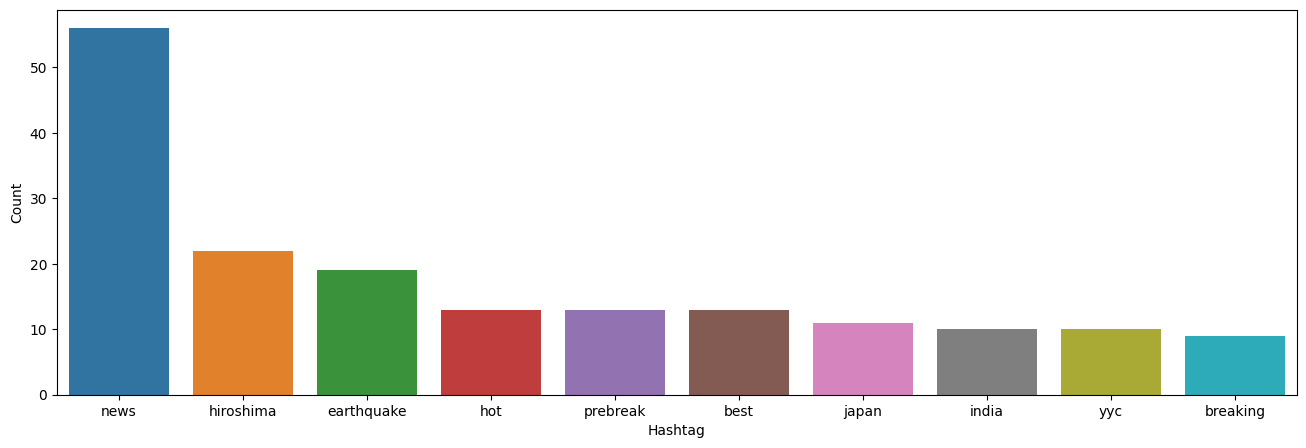

In [426]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [427]:
import string 

url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile('<.*?>')
email_pattern = re.compile(r'[\w\.-]+@[\w\.-]+')
user_pattern = re.compile(r'@[\w\.-]+')
number_pattern = re.compile(r'\d+')
accents_pattern = re.compile(u"[\u0300-\u036F]|é|è")
doublespace_pattern = re.compile(r'\s+')

def remove_pattern(text, pattern):
    return pattern.sub(r'', text)

def remove_accents(text, pattern):
    return pattern.sub(u"e", text)

def remove_puctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_double_space(text, pattern):
    return pattern.sub(' ', text)

def noise_reduction(text):
    text = remove_pattern(text, number_pattern)
    text = remove_pattern(text, url_pattern)
    text = remove_pattern(text, html_pattern)
    text = remove_pattern(text, email_pattern)
    text = remove_pattern(text, user_pattern)
    text = remove_accents(text, accents_pattern)
    text = remove_puctuation(text)
    text = remove_double_space(text, doublespace_pattern)
    
    return text

In [428]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: noise_reduction(x))
df[['text', 'tidy_text']].head(10)

,text,tidy_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,our deeds are the reason of this earthquake may allah forgive us all
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,all residents asked to shelter in place are being notified by officers no other evacuation or sh...
3,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders in california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,just got sent this photo from ruby alaska as smoke from wildfires pours into a school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas
7,I'm on top of the hill and I can see a fire in the woods...,i am on top of the hill and i can see a fire in the woods
8,There's an emergency evacuation happening now in the building across the street,there is an emergency evacuation happening now in the building across the street
9,I'm afraid that the tornado is coming to our area...,i am afraid that the tornado is coming to our area


In [429]:
from collections import Counter
cnt = Counter()
for text in df["tidy_text"].values:
    for word in text.split():
        cnt[word] += 1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-10-1:-1]])

print("Frequent words: ", FREQWORDS)
print("Rare words: ", RAREWORDS)

Frequent words:  {'a', 'you', 'i', 'is', 'in', 'of', 'and', 'for', 'to', 'the'}
Rare words:  {'fasteners', 'hattrick', 'ebolaoutbreak', 'ala', 'risen', 'rajman', 'cityofcalgary', 'xrwn', 'hasaka', 'issuicide'}


In [430]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

def remove_unnecessary_words(text):
    text = remove_stopwords(text)
    text = remove_freqwords(text)
    text = remove_rarewords(text)
    return text

In [431]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: remove_unnecessary_words(x))
df[['text', 'tidy_text']].head(10)

,text,tidy_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,residents asked shelter place notified officers evacuation shelter place orders expected
3,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got sent photo ruby alaska smoke wildfires pours school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,rockyfire update california hwy closed directions due lake county fire cafire wildfires
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster heavy rain causes flash flooding streets manitou colorado springs areas
7,I'm on top of the hill and I can see a fire in the woods...,top hill see fire woods
8,There's an emergency evacuation happening now in the building across the street,emergency evacuation happening building across street
9,I'm afraid that the tornado is coming to our area...,afraid tornado coming area


In [432]:
def stem_text(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    filtered_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(filtered_text)

In [433]:
df['tidy_text'] = df['tidy_text'].apply(lambda x: stem_text(x))
df[['text', 'tidy_text']].head(10)

,text,tidy_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,resident asked shelter place notified officer evacuation shelter place order expected
3,"13,000 people receive #wildfires evacuation orders in California",people receive wildfire evacuation order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,got sent photo ruby alaska smoke wildfire pours school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,rockyfire update california hwy closed direction due lake county fire cafire wildfire
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster heavy rain cause flash flooding street manitou colorado spring area
7,I'm on top of the hill and I can see a fire in the woods...,top hill see fire wood
8,There's an emergency evacuation happening now in the building across the street,emergency evacuation happening building across street
9,I'm afraid that the tornado is coming to our area...,afraid tornado coming area


<a id="4.4"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Transformating </b> data

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Is the collected data reasonable? </b></span>

<a id="5"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Exploratory Data Analysis</b></div>

<a id="5.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Making </b> question

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

  * **A possible question is:** 

  * **Answering this question will** help us to see 

  * **How we answer this question**: we will consider
  
</div>


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Pre-processing</b></span>


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Analyzing to get the answer</b></span>

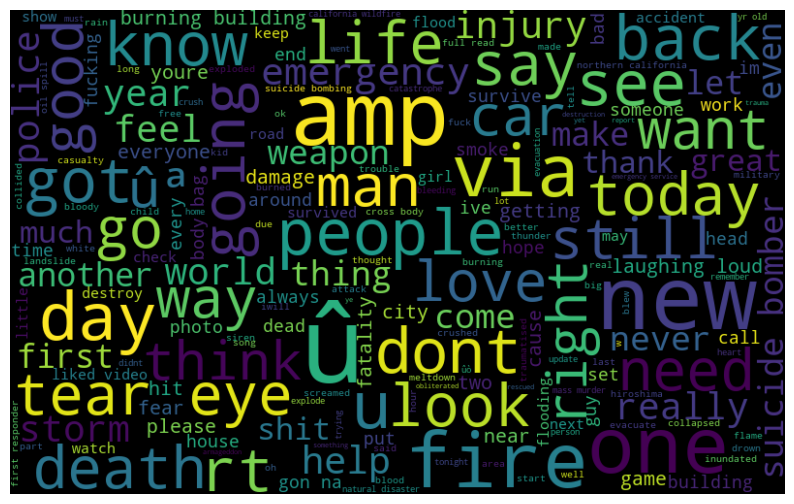

In [434]:
all_words = ' '.join([text for text in df['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

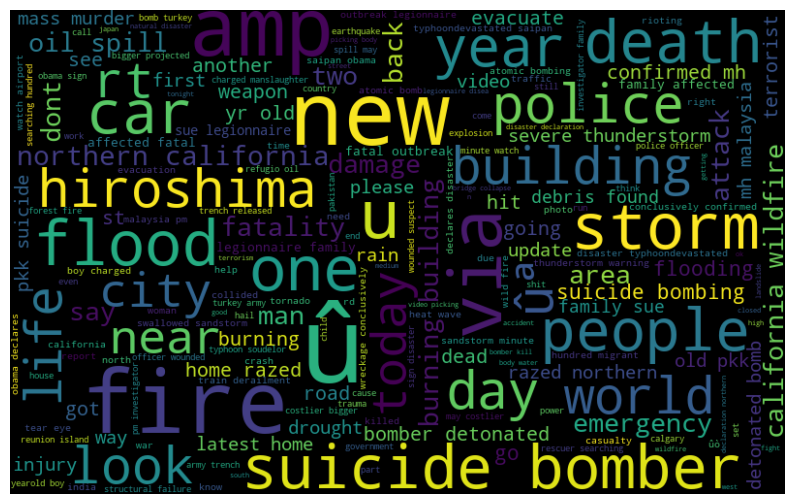

In [435]:
negative_words = ' '.join([text for text in df['tidy_text'][(df['Group'] == 'train') & (df['target'] == 1)]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<a id="6"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Machine Learning Model</b></div>

<a id="6.1"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Data </b> Preparation

In [436]:
train_sample, test_sample = df[df['Group'] == 'train'], df[df['Group'] == 'test']
train_sample.drop(columns=['Group', 'text'], inplace=True)
test_sample.drop(columns=['Group', 'text'], inplace=True)

In [437]:
train_sample.head()

,keyword,location,tidy_text,target,word_count,unique_word_count,stop_word_count,average_word_length,text_length,punctuation_count,url_link_count,hashtag_count,mention_count
0,None,None,deed reason earthquake may allah forgive u,1.0,13,13,6,4.3,69,1,0,1,0
1,None,None,forest fire near la ronge sask canada,1.0,7,7,0,4.4,38,1,0,0,0
2,None,None,resident asked shelter place notified officer evacuation shelter place order expected,1.0,22,18,11,5.0,133,3,0,0,0
3,None,None,people receive wildfire evacuation order california,1.0,7,7,1,7.1,65,2,0,1,0
4,None,None,got sent photo ruby alaska smoke wildfire pours school,1.0,16,15,7,4.4,88,2,0,2,0


In [438]:
train_sample.drop(columns=['keyword', 'location'], inplace=True)
train_sample['class'] = train_sample['target']
del train_sample['target']

In [439]:
train_sample['class'] = train_sample['class'].astype(int)

In [440]:
num_cols = train_sample.select_dtypes(include='number').columns.tolist()
cat_cols = train_sample.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['word_count', 'unique_word_count', 'stop_word_count', 'average_word_length', 'text_length', 'punctuation_count', 'url_link_count', 'hashtag_count', 'mention_count', 'class']
Categorical columns: ['tidy_text']


<a id="6.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Feature </b> engineering

In [441]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
num_cols.remove('class')
train_sample[num_cols] = scaler.fit_transform(train_sample[num_cols])

In [442]:
train_sample.head()

,tidy_text,word_count,unique_word_count,stop_word_count,average_word_length,text_length,punctuation_count,url_link_count,hashtag_count,mention_count,class
0,deed reason earthquake may allah forgive u,-0.214052,-0.093716,0.240636,-0.649643,-0.948439,-1.267124,-0.93408,0.507275,-0.501541,1
1,forest fire near la ronge sask canada,-1.208910,-1.203010,-1.340232,-0.553270,-1.866166,-1.267124,-0.93408,-0.404622,-0.501541,1
2,resident asked shelter place notified officer evacuation shelter place order expected,1.278235,0.830696,1.558026,0.024963,0.946223,-0.833139,-0.93408,-0.404622,-0.501541,1
3,people receive wildfire evacuation order california,-1.208910,-1.203010,-1.076754,2.048782,-1.066856,-1.050132,-0.93408,0.507275,-0.501541,1
4,got sent photo ruby alaska smoke wildfire pours school,0.283377,0.276049,0.504114,-0.553270,-0.385962,-1.050132,-0.93408,1.419171,-0.501541,1


In [443]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer

# Vectorize the preprocessed text
# vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# X = vectorizer.fit_transform(train_sample['tidy_text'])

# transformer = TfidfTransformer(norm='l2', smooth_idf=True, use_idf=True)
# X = transformer.fit_transform(X)


vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X = vectorizer.fit_transform(train_sample['tidy_text'])

In [444]:
vectorizer_train_sample = pd.concat([pd.DataFrame(X.toarray()), train_sample], axis=1).drop(columns=['tidy_text'])

In [445]:
vectorizer_train_sample.shape

(7613, 1010)

In [446]:
from sklearn.pipeline import Pipeline


class RmOutlierPipeline(Pipeline): # inherits the Pipeline class
    def __init__(self, cleaning, steps): # takes in 2 constructor parameters (cleaning and steps)
        self.cleaning = cleaning
        super(RmOutlierPipeline, self).__init__(steps) # pass the steps parameter to the base class (pipeline)
        
    def fit(self, X, y):
        # Before passing in X and y to my original pipeline, I wanna remove all the outliers first. 
        inliers = self.cleaning.fit(X, y).predict(X) == 1 
        return super(RmOutlierPipeline, self).fit(X[inliers], y[inliers])

In [447]:
def summarizeGrid(grid):
    print("\n====================================================\n")
    print("***MEAN TEST SCORES:**** \n")
    mean_scores = grid.cv_results_["mean_test_score"]
    z = mean_scores
    print(list(z))
    print("\n====================================================\n")
    print("***BEST SCORE:*** \n")
    print(grid.best_score_)
    print("\n====================================================\n")
    print("***BEST PARAMETER(S):*** \n")
    print(grid.best_params_)
    print("\n====================================================\n")
    print("***BEST ESTIMATOR:*** \n")
    print(grid.best_estimator_)

In [448]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import GridSearchCV

Scale = StandardScaler() # transformer
# DimReduction = PCA() # transformer 
Classifier = LogisticRegression() # estimator
OutlierRemoval = EllipticEnvelope() # estimator to be used before the steps

steps = [
    ("scale", Scale),
    # ("dimReduce", DimReduction),
    ("classify", Classifier)
]

pipe1 = RmOutlierPipeline(OutlierRemoval, steps)

# N_COMPONENTS = [3, 5, 7, 10, 15] # for PCA

# pGrid = [
#     {"dimReduce__n_components": N_COMPONENTS}
# ]

# grid1 = GridSearchCV(pipe1, cv = 5, n_jobs = 1, param_grid = pGrid)
# grid1.fit(X_train, y_train)

In [449]:
# OutlierRemoval = EllipticEnvelope(contamination=0.1) # estimator to be used before the steps
# inliers = OutlierRemoval.fit_predict(vectorizer_train_sample.drop(columns=['target']))
# vectorizer_train_sample = vectorizer_train_sample[inliers == 1]

In [450]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [457]:
num_cols.append('class')

In [458]:
pca_cols = list(set(vectorizer_train_sample.columns.tolist()) - set(num_cols))

In [460]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')

X_reduced = pca.fit_transform(vectorizer_train_sample[pca_cols])
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(f"Number of dimensions: {len(cumsum)}")

vectorizer_train_sample = pd.concat([pd.DataFrame(X_reduced), vectorizer_train_sample[num_cols]], axis=1)


Number of dimensions: 771


<a id="6.3"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Training </b> model

In [461]:
def getTrainValSample(data, fold):
    beginPos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0 : beginPos][:], data.iloc[beginPos + length:][:]])
    val = data.iloc[beginPos: beginPos + length][:]

    X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
    X_val, y_val = val.iloc[:, :-1], val.iloc[:, -1]
    
    return (X_train, y_train), (X_val, y_val)

In [462]:
def train_and_evaluate_model(model, data, n_iterations=10):
    train_accuracy = []
    val_accuracy = []
    
    for i in range(n_iterations):
        train, val = getTrainValSample(data, i)
        
        model.fit(train[0], train[1])
        
        train_accuracy.append(model.score(train[0], train[1]))
        val_accuracy.append(model.score(val[0], val[1]))
        
    return train_accuracy, val_accuracy

In [464]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

models = {
    #'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(criterion='gini', n_estimators=100, class_weight='balanced'),
    'SVM': SVC(kernel='linear', class_weight='balanced') 
}

result = {name: [] for name in models.keys()}
for name, model in models.items():
    print(f"Training {name} model...")
    vectorizer_train_sample.columns = vectorizer_train_sample.columns.astype(str)
    train_accuracy, val_accuracy = train_and_evaluate_model(model, vectorizer_train_sample)
    print(f"Training accuracy: {train_accuracy}")
    print(f"Validation accuracy: {val_accuracy}")
    result[name] = (train_accuracy, val_accuracy)
    
    print("\n====================================================\n")
    

Training LogisticRegression model...


Training accuracy: [0.827203736135435, 0.8274956217162872, 0.8273496789258611, 0.8251605370694688, 0.8277875072971396, 0.8273496789258611, 0.8277875072971396, 0.8250145942790427, 0.8250145942790427, 0.8218038528896673]
Validation accuracy: [0.7647831800262812, 0.7503285151116952, 0.7516425755584757, 0.7174770039421814, 0.7398160315374507, 0.6662286465177398, 0.7201051248357424, 0.7122207621550591, 0.7989487516425755, 0.7936925098554534]


Training RandomForest model...
Training accuracy: [0.9890542907180385, 0.9884705195563339, 0.9881786339754816, 0.9884705195563339, 0.9883245767659078, 0.9909515469935786, 0.9884705195563339, 0.9892002335084646, 0.9893461762988909, 0.9878867483946293]
Validation accuracy: [0.7450722733245729, 0.695137976346912, 0.7555847568988173, 0.7201051248357424, 0.6622864651773982, 0.6465177398160316, 0.7030223390275953, 0.7371879106438897, 0.7516425755584757, 0.7529566360052562]


Training SVM model...
Training accuracy: [0.8286631640396964, 0.8324576765907764, 0

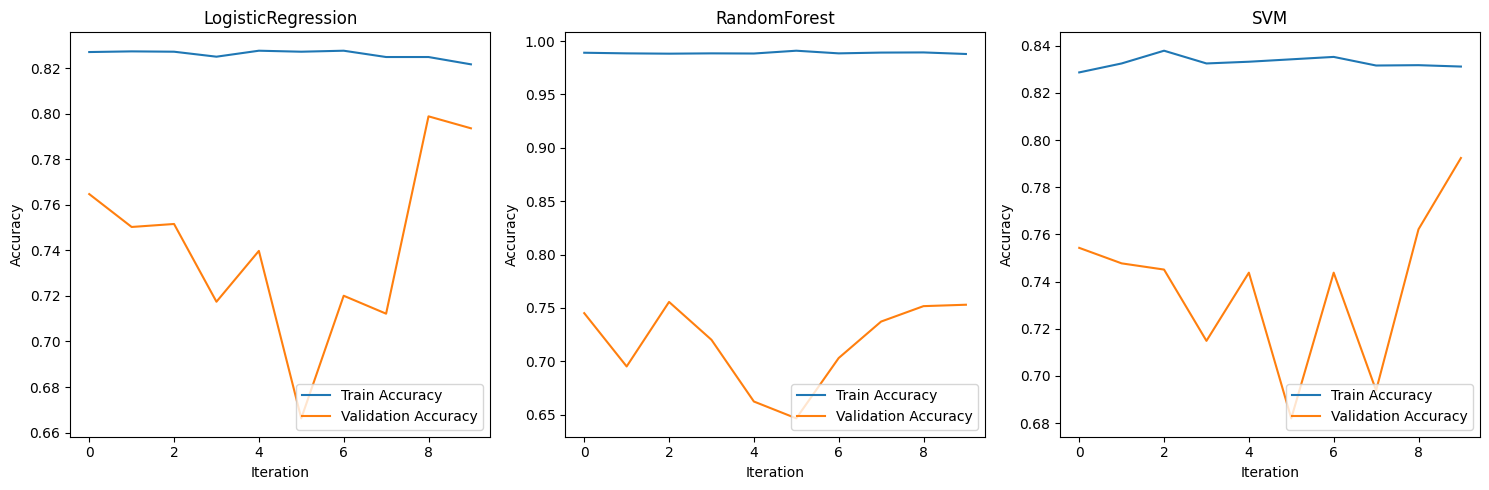

In [465]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
index = 0
for name, result in result.items():
    axes[index].plot(result[0], label='Train Accuracy')
    axes[index].plot(result[1], label='Validation Accuracy')
    
    axes[index].set_title(name)
    axes[index].set_xlabel('Iteration')
    axes[index].set_ylabel('Accuracy')
    axes[index].legend(loc='lower right')
    
    index += 1

plt.tight_layout()
plt.show()

In [467]:
import tensorflow as tf  

In [468]:
def getTrainValSample(data, fold):
    beginPos = round(data.shape[0] * fold / 10)
    length = round(data.shape[0] * 1 / 10)

    train = pd.concat([data.iloc[0 : beginPos][:], data.iloc[beginPos + length:][:]])
    val = data.iloc[beginPos: beginPos + length][:]

    return train, val

In [470]:
train_errors = []
val_errors= []

train, val = getTrainValSample(train_sample, 9)

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000)
encoder.adapt(np.array(train['tidy_text']))

model = tf.keras.Sequential([ 
    encoder, 
    tf.keras.layers.Embedding( 
        len(encoder.get_vocabulary()), 64, mask_zero=True), 
    tf.keras.layers.Bidirectional( 
        tf.keras.layers.LSTM(64, return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(1) 
]) 

# Summary of the model 
# model.summary() 

# Compile the model 
model.compile( 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

history = model.fit(train['tidy_text'], train['class'], epochs=10, batch_size=32,
                validation_data=(val['tidy_text'], val['class']))

train_errors.append(history.history['accuracy'][-1])
val_errors.append(history.history['val_accuracy'][-1])

df = pd.DataFrame({'train': train_errors, 'val': val_errors})
df


Epoch 1/10
215/215 [==============================] - 47s 106ms/step - loss: 0.5227 - accuracy: 0.7414 - val_loss: 0.4385 - val_accuracy: 0.7924
Epoch 2/10
215/215 [==============================] - 9s 40ms/step - loss: 0.3026 - accuracy: 0.8749 - val_loss: 0.4722 - val_accuracy: 0.7845
Epoch 3/10
215/215 [==============================] - 9s 41ms/step - loss: 0.1885 - accuracy: 0.9305 - val_loss: 0.6092 - val_accuracy: 0.7792
Epoch 4/10
215/215 [==============================] - 9s 41ms/step - loss: 0.1277 - accuracy: 0.9568 - val_loss: 0.7596 - val_accuracy: 0.7635
Epoch 5/10
215/215 [==============================] - 9s 40ms/step - loss: 0.0986 - accuracy: 0.9644 - val_loss: 0.7820 - val_accuracy: 0.7569
Epoch 6/10
215/215 [==============================] - 8s 39ms/step - loss: 0.0738 - accuracy: 0.9699 - val_loss: 0.9429 - val_accuracy: 0.7516
Epoch 7/10
215/215 [==============================] - 9s 41ms/step - loss: 0.0604 - accuracy: 0.9712 - val_loss: 0.9777 - val_accuracy: 0.76

,train,val
0,0.978109,0.762155


In [ ]:
# train_errors = []
# val_errors= []

# for i in range(10):
#     train_dataset, val_dataset = getTrainValSample(train_sample, i)
    
#     encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000)
#     encoder.adapt(np.array(train_dataset['tidy_text']))
    
#     model = tf.keras.Sequential([ 
#         encoder, 
#         tf.keras.layers.Embedding( 
#             len(encoder.get_vocabulary()), 64, mask_zero=True), 
#         tf.keras.layers.Bidirectional( 
#             tf.keras.layers.LSTM(64, return_sequences=True)), 
#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
#         tf.keras.layers.Dense(64, activation='relu'), 
#         tf.keras.layers.Dense(1) 
#     ]) 

#     # Summary of the model 
#     # model.summary() 

#     # Compile the model 
#     model.compile( 
#         loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
#         optimizer=tf.keras.optimizers.Adam(), 
#         metrics=['accuracy'] 
#     )
    
#     history = model.fit(train_dataset['tidy_text'], train_dataset['target'], epochs=10, batch_size=32,
#                     validation_data=(val_dataset['tidy_text'], val_dataset['target']))
    
#     train_errors.append(history.history['accuracy'][-1])
#     val_errors.append(history.history['val_accuracy'][-1])

# df = pd.DataFrame({'train': train_errors, 'val': val_errors})
# df


<a id="6.4"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Evaluation </b>

In [ ]:
train, val = getTrainValSample(vectorizer_train_sample, 9)

In [ ]:
model = LogisticRegression()
model.fit(train[0], train[1])

print(f"Training accuracy: {model.score(train[0], train[1])}")
print(f"Validation accuracy: {model.score(val[0], val[1])}")

Training accuracy: 0.8194687682428488
Validation accuracy: 0.7884362680683311


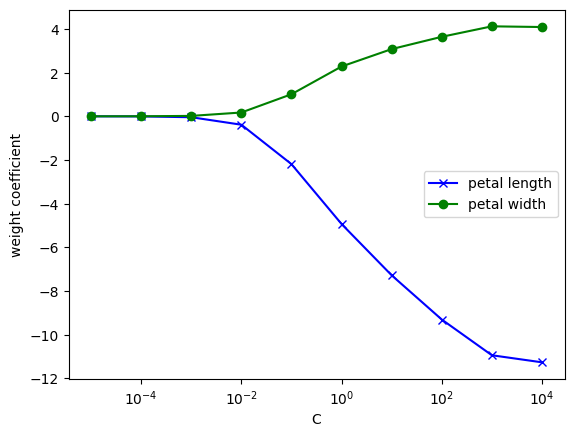

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=0)
    lr.fit(train[0], train[1])
    weights.append(lr.coef_[0])
    params.append(10.0**c)

weights = np.array(weights)

# Decision region drawing
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=42, C=0.05)
model.fit(train[0], train[1])

print(f"Training accuracy: {model.score(train[0], train[1])}")
print(f"Validation accuracy: {model.score(val[0], val[1])}")

Training accuracy: 0.723292469352014
Validation accuracy: 0.6885676741130092


<a id="6.5"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Prediction </b>

<a id="6.6"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #CCFFFF; padding: 15px;  border-bottom: 2px solid blue;
"><b>Results </b> analysis

<a id="7"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Conclusion</b></div>

<a id="8"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Author Message</b></div>

[//]: <> (Author Message)
<div style=" border-radius:10px; border:1px solid blue; padding: 15px; background-color:#CCFFCC; color: #4E5672; font-size:90%; text-align:left;">

<h4><b>Author :</b> Nguyen Tuan Thanh </h4>

<h4> <b>Some information:</b> </h4>

<b>👉 Read more project :</b> <span style="color: #00FF00;">https://www.kaggle.com/nttthanh</span> <br>
<b>👉 Shoot me mails :</b> <span style="color: #00FF00;">thanh.ntt0504@gmail.com</span><br>
<b>👉 Connect on LinkedIn :</b> <span style="color: #00FF00;">https://www.linkedin.com/in/ntthanh0504/</span> <br>
<b>👉 Explore Github :</b> <span style="color: #00FF00;">https://github.com/ntthanh0504</span> <br>
    
<center> <strong style="color: orange;"> If you liked this Notebook, please do upvote. </strong>
    
<center> <strong style="color: orange;"> If you have any questions, feel free to comment! </strong>
    